In [1]:
import numpy as np
from implementations import *
from proj1_helpers import *
import matplotlib.pyplot as plt
from costs import *
yb, input_data, ids = load_csv_data('Data/train.csv')

In [2]:
yb_te, input_data_te, ids_te = load_csv_data('Data/test.csv')

In [ ]:
#replace the value -999 by the mean of the feature corresponding to s or b
def replace_nan(splitarray):
    a_shape = splitarray.shape
    splitarray = splitarray.reshape(a_shape[0], -1)
    a_hsplit = np.hsplit(splitarray, a_shape[2])
    for a in a_hsplit:
        temp = a[a>-999]
        mean = np.mean(temp)
        np.place(a, a<=-999, mean)
    return np.hstack(a_hsplit)

    

In [2]:
def correlation_feat_y(y , feature):
    return np.corrcoef(feature, y)

In [ ]:
#calculate the Pearson product-moment correlation coefficients between the output and the features
# WARNING # We should erase the drop the NaN value to compute the correlation. BE CAREFUL to drop the relevant
# indices of y also
correlation_matrices =[]
for feature in np.hsplit(input_data, input_data.shape[1]):
    correlation_matrices.append(correlation_feat_y(yb, feature))
    
#input_data[input_data > -999]
#get the data with prediction s with nan value replaced by the mean of the split feature
s_predict = input_data[np.argwhere(yb>0)]
s_predict = replace_nan(s_predict)
#get the data with prediction b with nan value replaced by the mean of the split feature
b_predict = input_data[np.argwhere(yb<0)]
b_predict = replace_nan(b_predict)
    

    

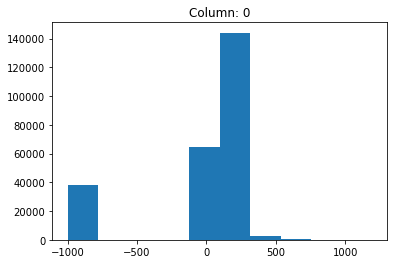

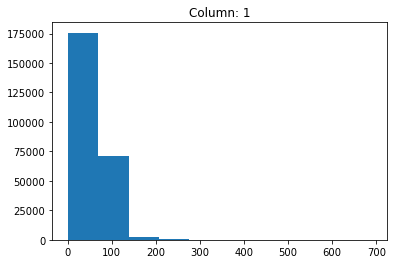

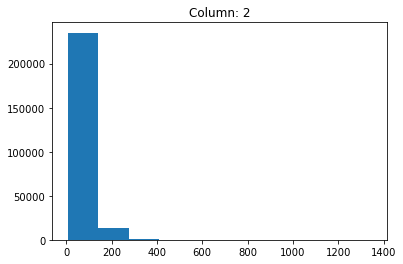

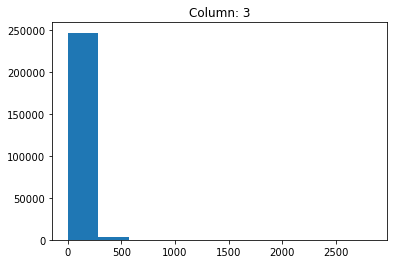

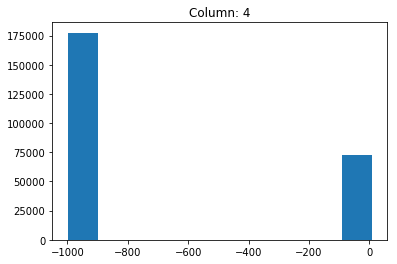

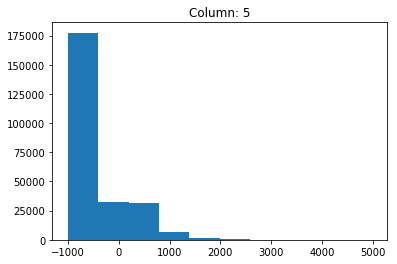

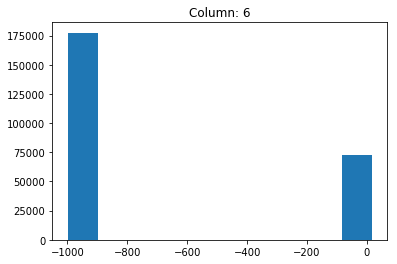

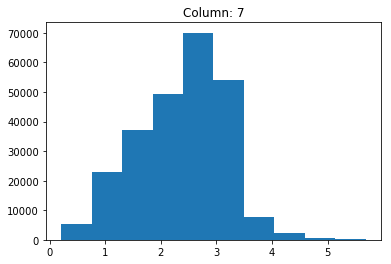

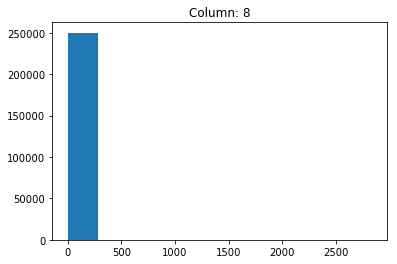

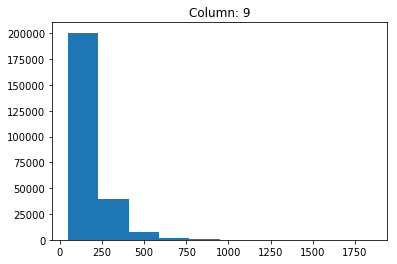

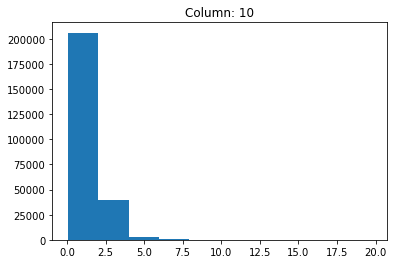

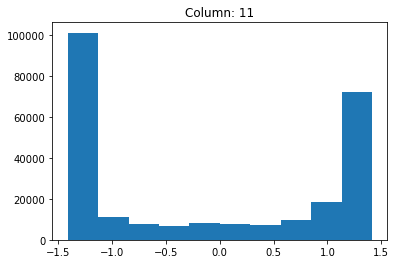

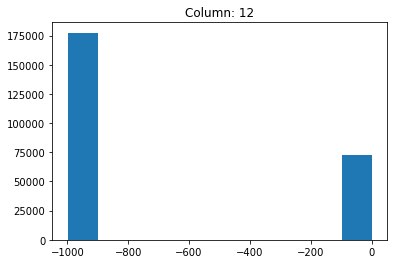

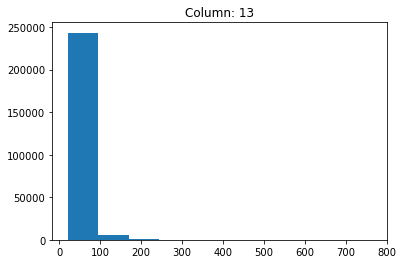

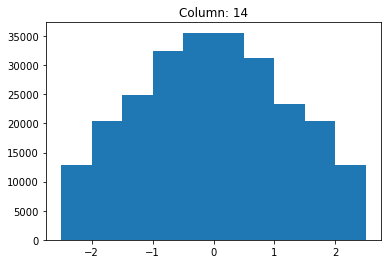

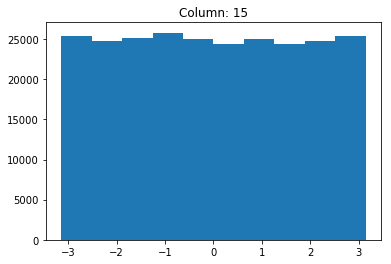

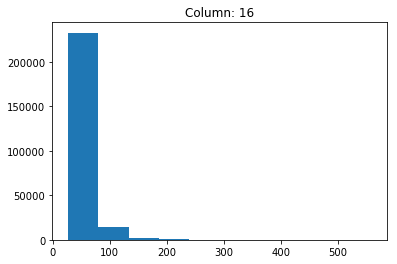

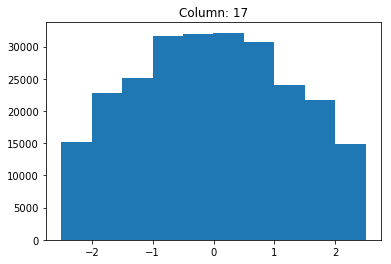

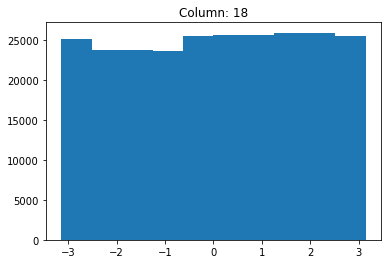

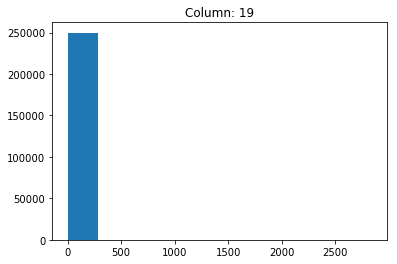

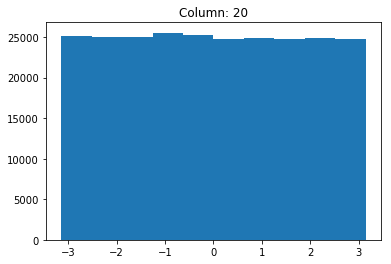

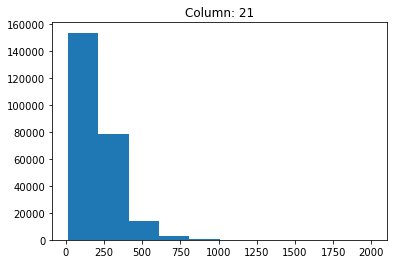

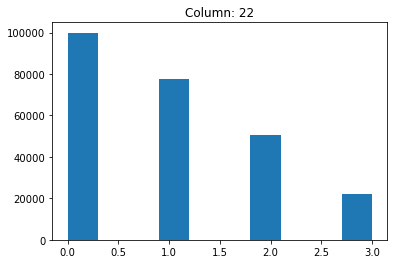

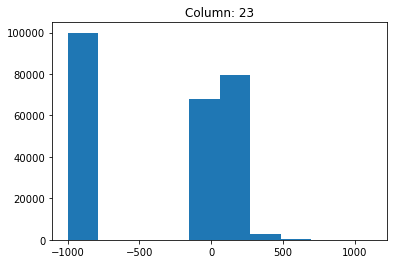

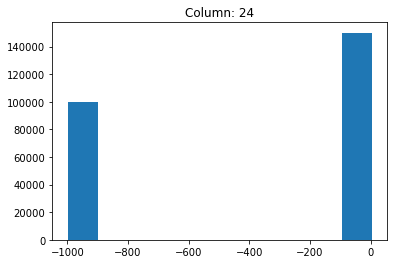

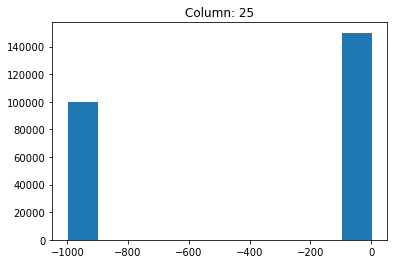

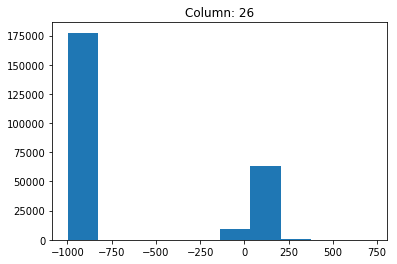

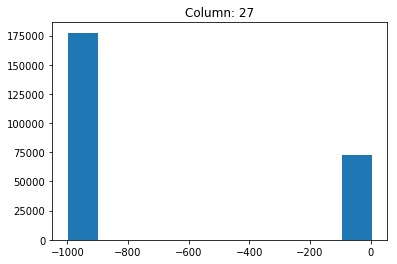

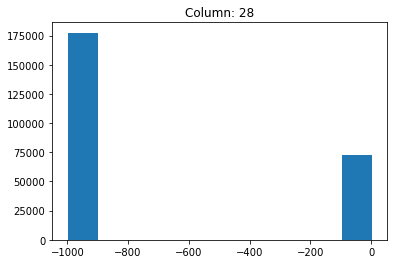

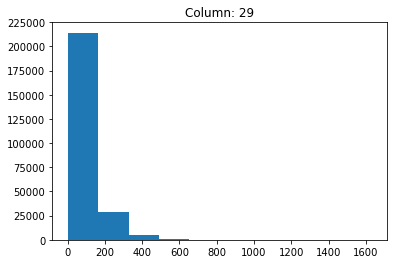

In [3]:
#plot the histogram of each features
for i in range(input_data.shape[1]):
    plt.hist(input_data[:,i])
    plt.title('Column: '+ str(i))
    plt.show()

In [4]:
#create a copy of the training inpute date and removes the features with a majority of -999
cop = input_data.copy()
cop = np.delete(cop, [4,5,6,12,23,24,26,27,28],axis= 1)
cop.shape

(250000, 21)

In [5]:
#hsplit_ = np.hsplit(input_data,len(input_data[0]))

In [ ]:
#least squares with the normal equation
w, e = least_squares(yb, cop)
#transpose the vector w to use it in the newtons method
w = w.reshape(w.shape[0],1)

###
# not working yet
###
#loss, w = new_logistic_regression(yb, cop, 0.1, w , 1000,0.6)
#loss

In [ ]:
#helper function that create the prediction of y for the test data
y_pred = predict_labels(w, np.delete(input_data_te,[4,5,6,12,26,27,28],axis= 1))


In [ ]:
#create the csv file to submit on kraggle
create_csv_submission(ids_te, y_pred, 'least_square_first_test.csv')